In [14]:
import xarray 
import os
import netCDF4
import numpy as np
import matplotlib.pyplot as plt
import imdlib as imd
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import scipy.io
import matplotlib.image as mpimg
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score


In [15]:
cluster8_1 = pd.read_csv(r"C:\Users\ratho\Desktop\Software Group Project - III\Github\Climate Data Modelling\Climate-Data-Modelling\Codes\Main Codes\Abhi's Code\Clustering\SSTA Cluster Number 1901-2010 with 8 clusters.csv",index_col=0)
cluster8_2 = pd.read_csv(r"C:\Users\ratho\Desktop\Software Group Project - III\Github\Climate Data Modelling\Climate-Data-Modelling\Codes\Main Codes\Abhi's Code\Clustering\SSTA Cluster Number 2011-2022 with 8 clusters.csv",index_col=0)

In [16]:
cluster_8=pd.concat([cluster8_1,cluster8_2])
cluster_8=cluster_8.set_index(i for i in range(122))

In [17]:
cluster_8['Cluster Number'] = cluster_8['Cluster Number'].replace(0,10) #
cluster_8['Cluster Number'] = cluster_8['Cluster Number'].replace(1,11)
cluster_8['Cluster Number'] = cluster_8['Cluster Number'].replace(2,12)
cluster_8['Cluster Number'] = cluster_8['Cluster Number'].replace(3,13) #
cluster_8['Cluster Number'] = cluster_8['Cluster Number'].replace(4,14) #
cluster_8['Cluster Number'] = cluster_8['Cluster Number'].replace(5,15) #
cluster_8['Cluster Number'] = cluster_8['Cluster Number'].replace(6,16) #
cluster_8['Cluster Number'] = cluster_8['Cluster Number'].replace(7,17) #

In [18]:
cluster_8['Cluster Number'] = cluster_8['Cluster Number'].replace(14,0)
cluster_8['Cluster Number'] = cluster_8['Cluster Number'].replace(17,1)
cluster_8['Cluster Number'] = cluster_8['Cluster Number'].replace(10,2)
cluster_8['Cluster Number'] = cluster_8['Cluster Number'].replace(13,3)
cluster_8['Cluster Number'] = cluster_8['Cluster Number'].replace(15,4)
cluster_8['Cluster Number'] = cluster_8['Cluster Number'].replace(16,5)
cluster_8['Cluster Number'] = cluster_8['Cluster Number'].replace(12,6)
cluster_8['Cluster Number'] = cluster_8['Cluster Number'].replace(11,7)

In [19]:
cluster_8

,Cluster Number
0,0
1,1
2,1
3,2
4,1
...,...
117,7
118,7
119,7
120,6


C:\Users\ratho\AppData\Local\Temp\ipykernel_27444\2898384034.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(cluster_8.index, cluster_8['Cluster Number'], c=cluster_8['Cluster Number'].map(colors), cmap='viridis', s=100)  # Adjust 's' for marker size


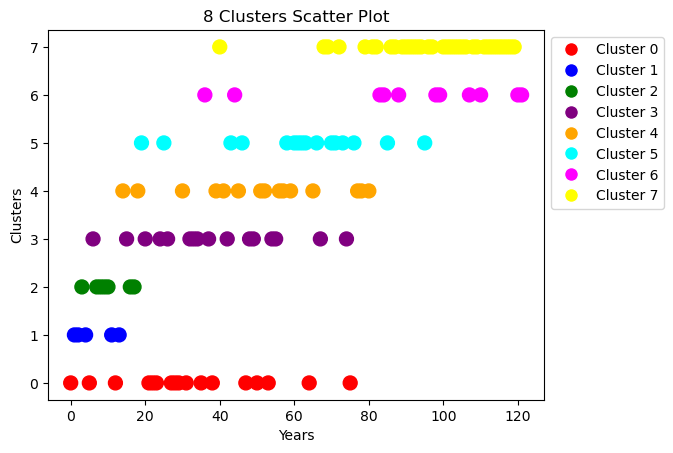

In [20]:
# Define a color map for your clusters
colors = {0: 'red', 1: 'blue', 2: 'green', 3: 'purple', 4: 'orange', 5: 'cyan', 6: 'magenta', 7: 'yellow'}

# Create a scatter plot with larger markers (s parameter)
plt.scatter(cluster_8.index, cluster_8['Cluster Number'], c=cluster_8['Cluster Number'].map(colors), cmap='viridis', s=100)  # Adjust 's' for marker size

# Add labels and title
plt.xlabel('Years')
plt.ylabel('Clusters')
plt.title('8 Clusters Scatter Plot')

# Show the color legend
legend_labels = {cluster: color for cluster, color in colors.items() if cluster in cluster_8['Cluster Number'].unique()}
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}', markerfacecolor=color, markersize=10) for cluster, color in legend_labels.items()]
plt.legend(handles=legend_handles,loc='upper left', bbox_to_anchor=(1, 1))

# Display the plot
plt.show()

In [21]:
cluster6_1 = pd.read_csv(r"C:\Users\ratho\Desktop\Software Group Project - III\Github\Climate Data Modelling\Climate-Data-Modelling\Codes\Main Codes\Abhi's Code\Clustering\SST Cluster Number 1901-2010 with 6 clusters.csv",index_col=0)
cluster6_2 = pd.read_csv(r"C:\Users\ratho\Desktop\Software Group Project - III\Github\Climate Data Modelling\Climate-Data-Modelling\Codes\Main Codes\Abhi's Code\Clustering\SST Cluster Number 2011-2022 with 6 clusters.csv",index_col=0)

In [22]:
cluster_6=pd.concat([cluster6_1,cluster6_2])
cluster_6=cluster_6.set_index(i for i in range(122))

In [23]:
cluster_6['Cluster Number'] = cluster_6['Cluster Number'].replace(0,10) #
cluster_6['Cluster Number'] = cluster_6['Cluster Number'].replace(1,11)
cluster_6['Cluster Number'] = cluster_6['Cluster Number'].replace(2,12)
cluster_6['Cluster Number'] = cluster_6['Cluster Number'].replace(3,13) #
cluster_6['Cluster Number'] = cluster_6['Cluster Number'].replace(4,14) #
cluster_6['Cluster Number'] = cluster_6['Cluster Number'].replace(5,15) #


In [24]:
cluster_6['Cluster Number'] = cluster_6['Cluster Number'].replace(12,0)
cluster_6['Cluster Number'] = cluster_6['Cluster Number'].replace(11,1)
cluster_6['Cluster Number'] = cluster_6['Cluster Number'].replace(14,2)
cluster_6['Cluster Number'] = cluster_6['Cluster Number'].replace(15,3)
cluster_6['Cluster Number'] = cluster_6['Cluster Number'].replace(13,4)
cluster_6['Cluster Number'] = cluster_6['Cluster Number'].replace(10,5)


C:\Users\ratho\AppData\Local\Temp\ipykernel_27444\3438812577.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(cluster_6.index, cluster_6['Cluster Number'], c=cluster_6['Cluster Number'].map(colors), cmap='viridis', s=100)  # Adjust 's' for marker size


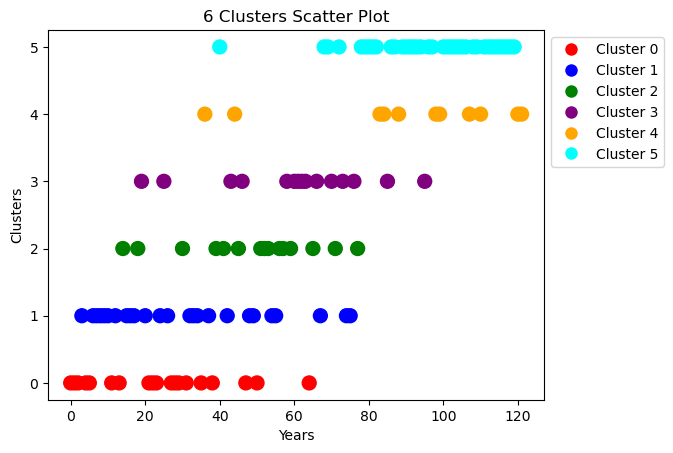

In [26]:
# Define a color map for your clusters
colors = {0: 'red', 1: 'blue', 2: 'green', 3: 'purple', 4: 'orange', 5: 'cyan'}

# Create a scatter plot with larger markers (s parameter)
plt.scatter(cluster_6.index, cluster_6['Cluster Number'], c=cluster_6['Cluster Number'].map(colors), cmap='viridis', s=100)  # Adjust 's' for marker size

# Add labels and title
plt.xlabel('Years')
plt.ylabel('Clusters')
plt.title('6 Clusters Scatter Plot')

# Show the color legend
legend_labels = {cluster: color for cluster, color in colors.items() if cluster in cluster_6['Cluster Number'].unique()}
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}', markerfacecolor=color, markersize=10) for cluster, color in legend_labels.items()]
plt.legend(handles=legend_handles,loc='upper left', bbox_to_anchor=(1, 1))

# Display the plot
plt.show()